# K-Nearest Neighbours

KNN is the simplest machine learning algorithm used for classification and regression. It makes decision based on the entire training dataset. No time is spent on training the algorithm but only for pre-processing and testing.

The algorithm makes predictions by calculating similarity between the input sample and each training instance. This algorithm does not make strong assumptions about the form of mapping function hence it is Nonparametric. In simple words, by not making assumptions, the algorithm is free to learn any functional form from the training data.

Algorithm

Let m be the number of training data samples. Let p be an unknown point.

    Store the training samples in an array of data points arr[].This means each element of this array represents a tuple (x, y).
    
    for i=0 to m: Calculate distance d(arr[i], p).
        
    Make set S of K smallest distances obtained. Each of these distances correspond to an already classified data point.
    
    Return the majority label among S.

Distance can be calculated using Euclidean distance, Manhattan distance, Hamming Distance and Minkowski Distance

Here we are going to use KNN for classification in the given dataset

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# Read in credit into a dataframe 
credit = pd.read_csv('credit_train.csv')

#dataset is too big,hence processing is done only on top 20000 instances
credit=credit[:20000]

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
#size of the dataset
credit.shape


(20000, 19)

In [4]:
# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
Loan ID                         20000 non-null object
Customer ID                     20000 non-null object
Loan Status                     20000 non-null object
Current Loan Amount             20000 non-null float64
Term                            20000 non-null object
Credit Score                    16140 non-null float64
Annual Income                   16140 non-null float64
Years in current job            19136 non-null object
Home Ownership                  20000 non-null object
Purpose                         20000 non-null object
Monthly Debt                    20000 non-null float64
Years of Credit History         20000 non-null float64
Months since last delinquent    9272 non-null float64
Number of Open Accounts         20000 non-null float64
Number of Credit Problems       20000 non-null float64
Current Credit Balance          20000 non-null float64
Maximum Open Credit

In [5]:
# Statistics for each column
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,2.000000e+04,16140.000000,1.614000e+04,20000.000000,20000.00000,9272.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04,19956.000000,19997.000000
mean,1.151254e+07,1094.310471,1.376165e+06,18484.626320,18.17891,35.201790,11.146850,0.169800,2.970717e+05,7.816903e+05,0.120565,0.027554
std,3.148219e+07,1509.079267,9.044242e+05,12255.602078,6.91879,22.056407,5.028275,0.474741,4.254513e+05,6.700117e+06,0.354229,0.231520
min,1.124200e+04,586.000000,9.703300e+04,0.000000,3.60000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796025e+05,705.000000,8.476470e+05,10137.782500,13.50000,16.000000,8.000000,0.000000,1.117200e+05,2.724810e+05,0.000000,0.000000
50%,3.129280e+05,724.000000,1.168367e+06,16176.980000,16.90000,32.000000,10.000000,0.000000,2.091140e+05,4.664000e+05,0.000000,0.000000
75%,5.230115e+05,741.000000,1.644925e+06,24073.617500,21.60000,52.000000,14.000000,0.000000,3.698540e+05,7.877540e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.083900e+07,205801.350000,65.00000,152.000000,56.000000,7.000000,3.287897e+07,6.324777e+08,5.000000,6.000000


In [6]:
# These two features are only for identification. SO we are dropping it
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [7]:
#helper function

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n""There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(credit)

The selected dataframe has 17 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,10728,53.6
Credit Score,3860,19.3
Annual Income,3860,19.3
Years in current job,864,4.3
Bankruptcies,44,0.2
Tax Liens,3,0.0


In [9]:
# We drop the columns with > 50% missing
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [10]:
credit[credit['Years of Credit History'].isnull() == True]

# Here we can see that the last 514 observations are NaN values.

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [11]:
credit.drop(credit.tail(514).index, inplace=True) # dropped last 514 rows
missing_values_table(credit)

The selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,3764,19.3
Annual Income,3764,19.3
Years in current job,836,4.3
Bankruptcies,42,0.2
Tax Liens,3,0.0


In [12]:
# As the number of missing values is so low in the 'Maximum Open Credit' we drop them.

for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)



The selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,3764,19.3
Annual Income,3764,19.3
Years in current job,836,4.3
Bankruptcies,42,0.2
Tax Liens,3,0.0


In [13]:
# As the number of missing values is so low in the 'Tax Liens' we again drop them.


for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)



The selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,3764,19.3
Annual Income,3764,19.3
Years in current job,836,4.3
Bankruptcies,39,0.2


In [14]:
# As the number of missing values is so low in the 'Bankruptcies' we again drop them.


for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

The selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,3759,19.3
Annual Income,3759,19.3
Years in current job,836,4.3


In [15]:
# Now we will use the 'mean'  to fill the NaN values.

credit.fillna(credit.mean(), inplace=True)
missing_values_table(credit)


The selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,836,4.3


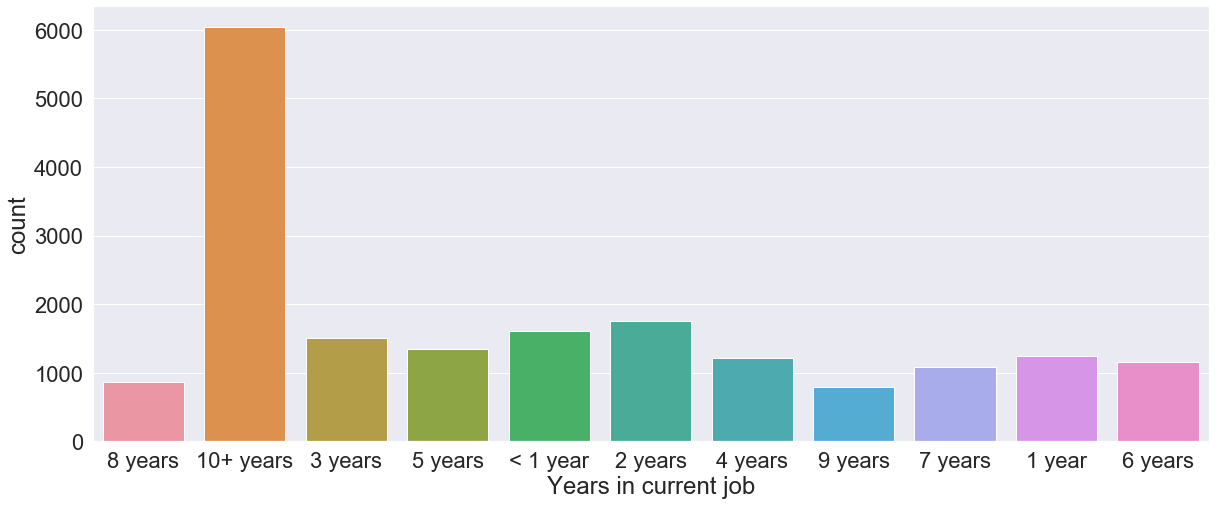

In [16]:
# The feature 'Years in current job' was not filled because it has categorical values.

plt.figure(figsize=(20,8))

sns.countplot(credit['Years in current job'])




In [17]:
# We can see that the value '10+ years' is strongly present in this feature, so we will use this value to fill the 
# missing values.

credit.fillna('10+ years', inplace=True) # fill with '10+ years'.
missing_values_table(credit)

The selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [18]:
#size of the processed dataset
credit.shape

(19444, 16)

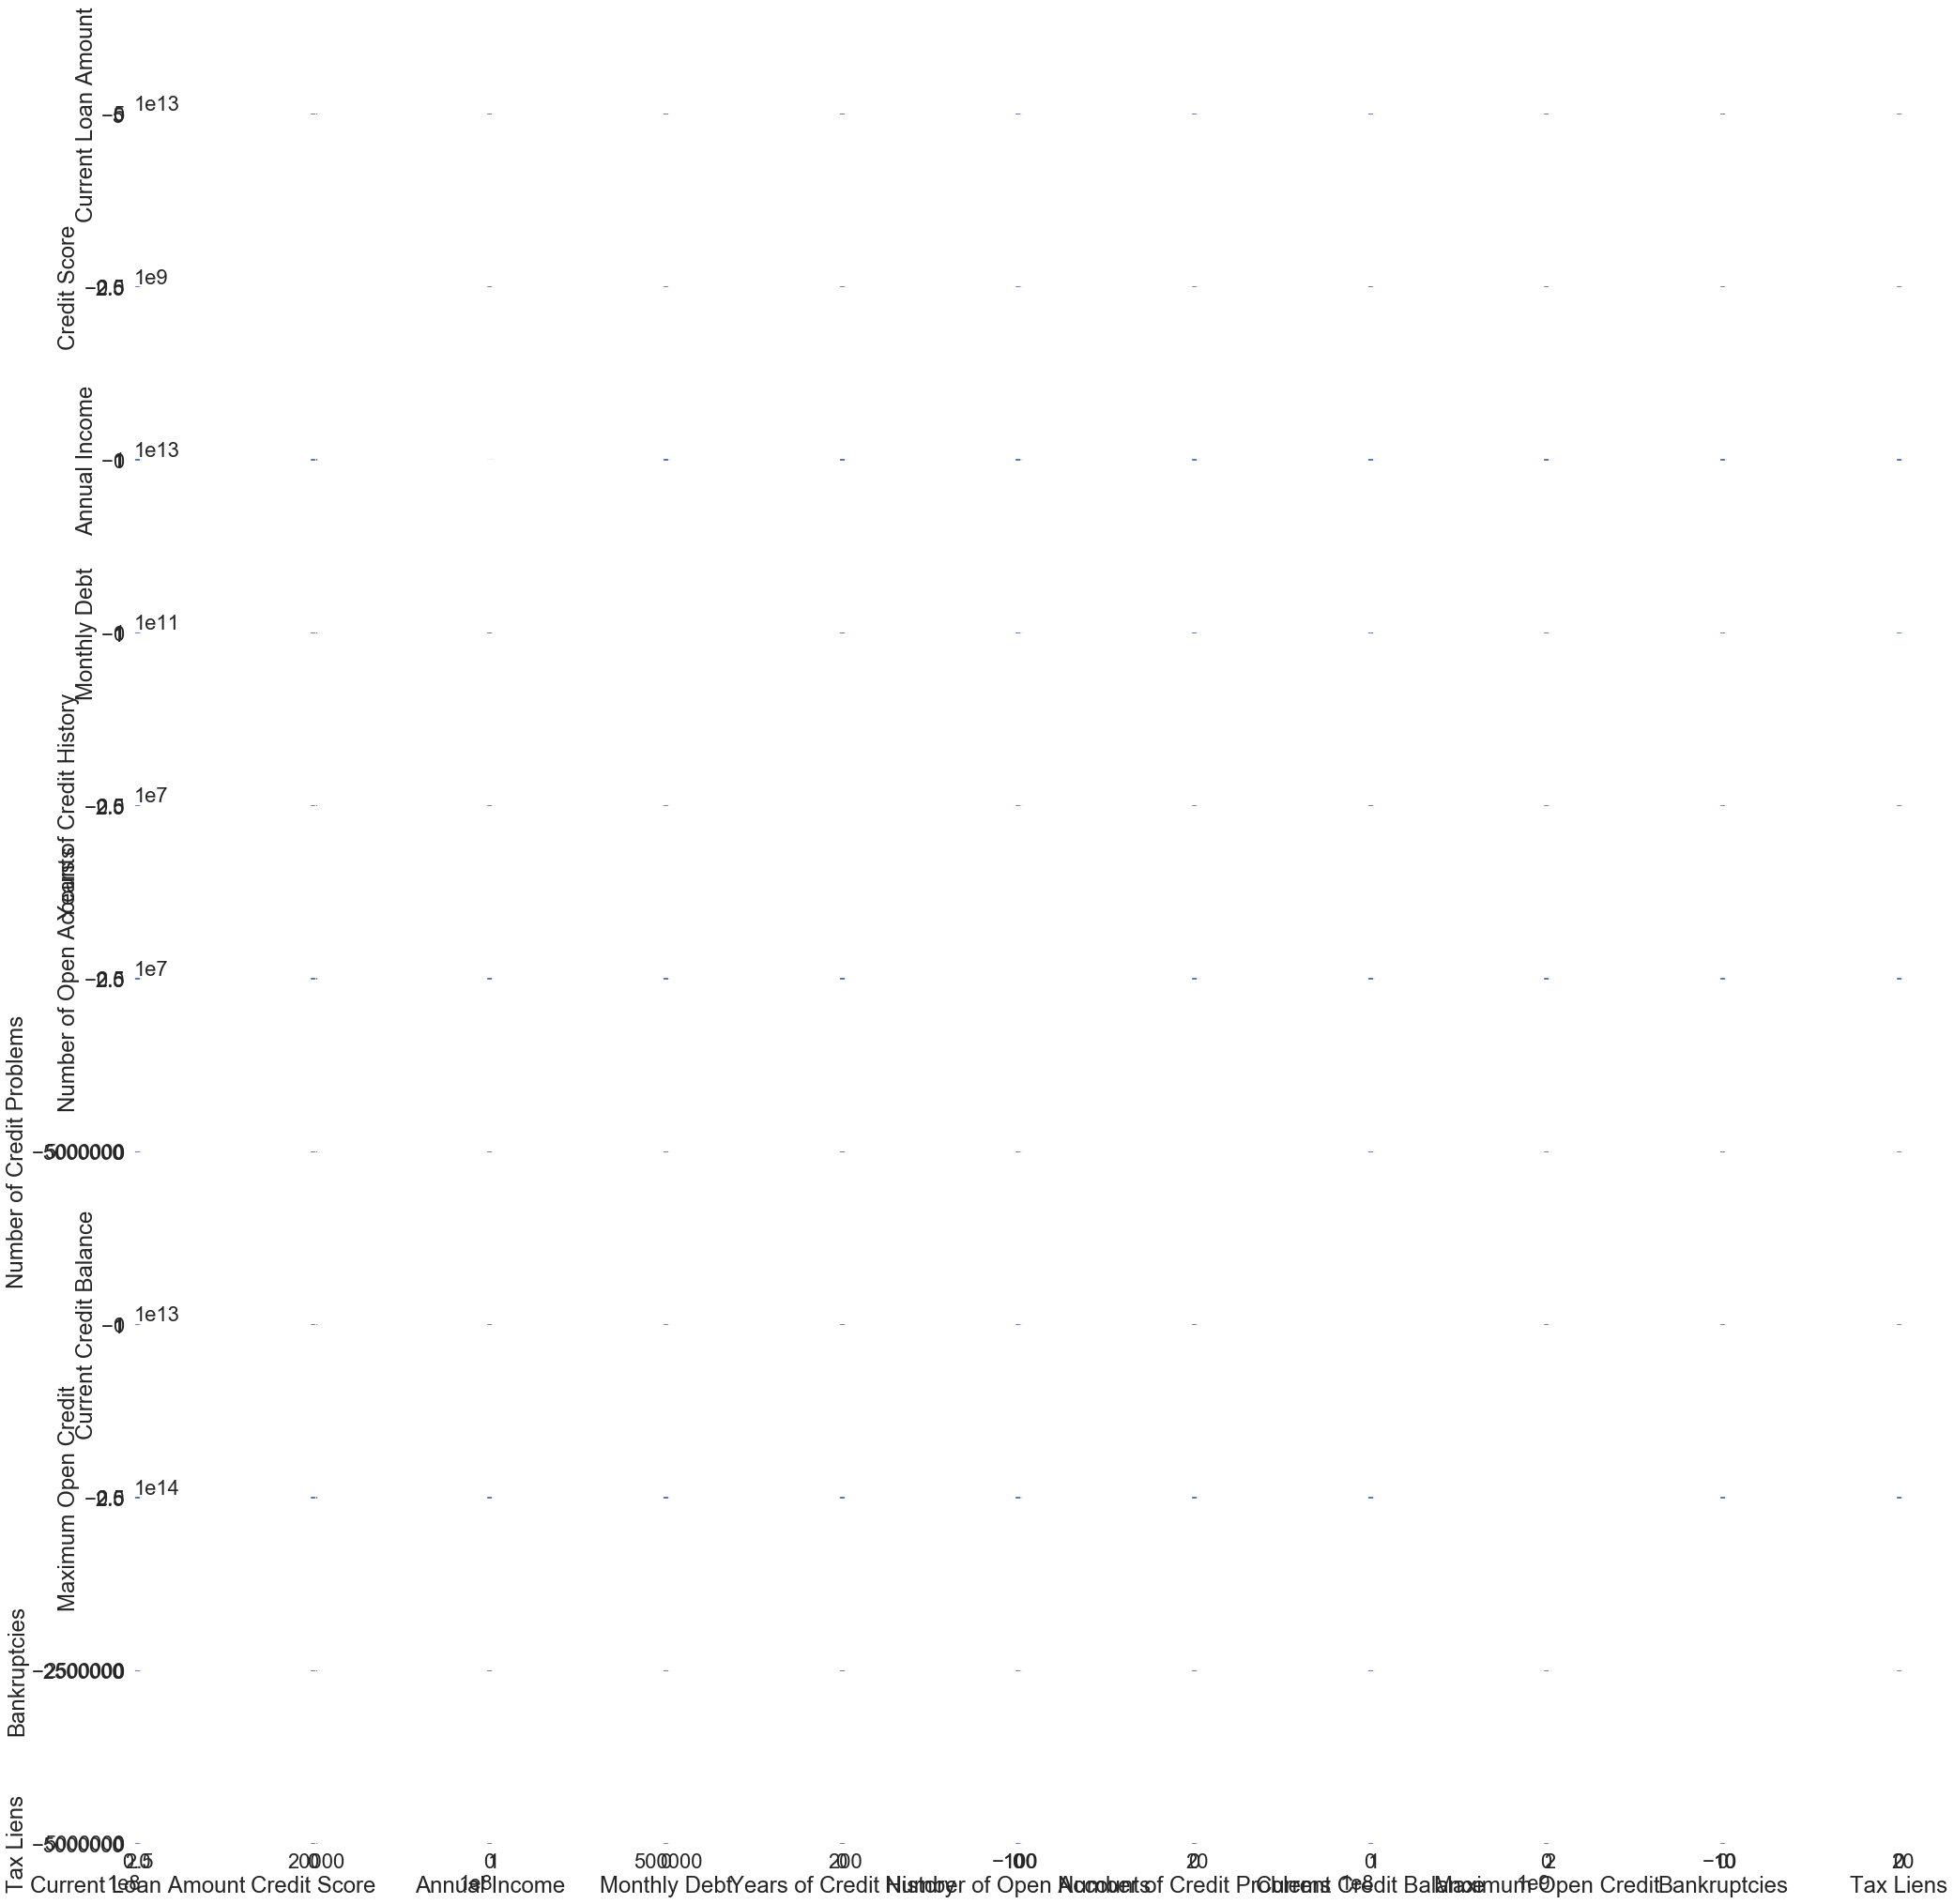

In [19]:
# # # Exploratory Data Analysis

sns.pairplot(credit)

# We can see in this pairplot graph that this dataset is extremely concentraded is 'zero' value, so no overfitting analysis

In [20]:
# # Correlations between Features and Target

# Find all the correlations and sort them
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Current Credit Balance       0.010313
Maximum Open Credit          0.001910
Number of Open Accounts      0.000686
Tax Liens                   -0.002754
Monthly Debt                -0.005098
Bankruptcies                -0.009826
Number of Credit Problems   -0.010396
Years of Credit History     -0.018144
Annual Income               -0.032219
Current Loan Amount         -0.096563
Name: Credit Score, dtype: float64>


In [21]:
# # # Feature Engineering and Selection

credit.columns


Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [22]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train

# First we will drop the 'old' categorical datas and afterwards we will join the 'new' one.

credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [23]:
#Current values
credit.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,Fully Paid,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,0
1,Fully Paid,262328.0,1094.393943,1.376901e+06,33295.98,21.1,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,176220.0,1094.393943,1.376901e+06,20639.70,6.1,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets

#Our target is to get the Loan Statues for a particular instance

features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15555, 44)
(3889, 44)
(15555, 1)
(3889, 1)


In [25]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train.values.ravel())
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test.values.ravel())

In [26]:
X_train

array([[-0.35241281,  4.68059023,  0.06266208, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.35530157, -0.34658662,  0.08901652, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.3516525 , -0.3287808 ,  0.48021171, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       ...,
       [-0.35846661, -0.25829942, -0.32237381, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.35839456, -0.2642347 , -0.94043243, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.35145246, -0.26200897,  0.14921273, ..., -0.05013516,
        -0.03931026, -0.0240609 ]])

In [27]:
y_train

array([0, 1, 0, ..., 1, 0, 1])

In [28]:
X_test

array([[-0.35041586, -0.31171688, -0.58335377, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.35549532, -0.28797579,  0.30697303, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.34058081, -0.34065134,  1.11052022, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       ...,
       [-0.35827496,  4.56188476, -0.72778802, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.35768042,  4.52478929, -0.92216063, ..., -0.05013516,
        -0.03931026, -0.0240609 ],
       [-0.35454755, -0.26200897, -0.11765176, ..., -0.05013516,
        -0.03931026, -0.0240609 ]])

In [29]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [30]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski', p = 2)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

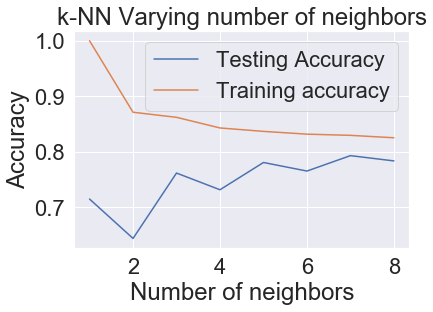

In [31]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [32]:
error = []

# Calculating error for K values between 1 and 9
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

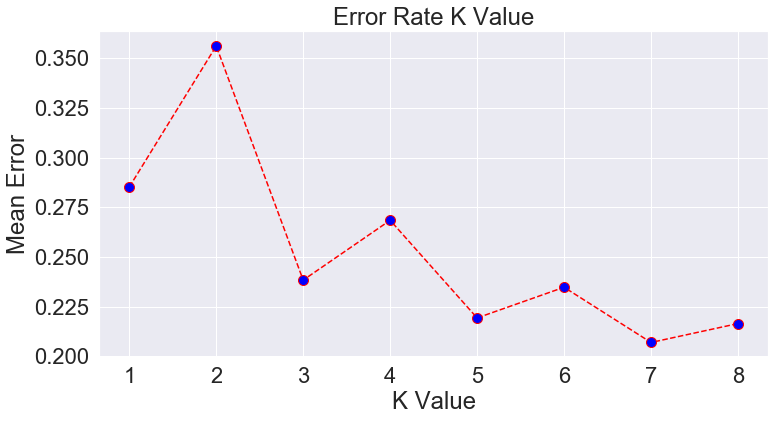

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 9), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the above diagrams, we observe that we get maximum testing accuracy for k=7 and least error rate. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [34]:

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix


knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
# Evaluation
train_accuracy=knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('KNN Performance on the train set:  Score = %0.4f' % train_accuracy)
print('KNN Performance on the test set:  Score = %0.4f' % test_accuracy)

accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)
knn_cross=accuracies.mean()
print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

y_pred = knn.predict(X_test)


KNN Performance on the train set:  Score = 0.8296
KNN Performance on the test set:  Score = 0.7930
KNN Performance on the test set: Cross Validation Score = 0.7997


## Confusion Matrix:

In [35]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#We get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 222,  704],
       [ 101, 2862]], dtype=int64)

In [36]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,222,704,926
1,101,2862,2963
All,323,3566,3889


## Classification Report:

In [37]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.24      0.36       926
           1       0.80      0.97      0.88      2963

    accuracy                           0.79      3889
   macro avg       0.74      0.60      0.62      3889
weighted avg       0.78      0.79      0.75      3889



## ROC (Reciever Operating Charecteristic) curve:

In [38]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

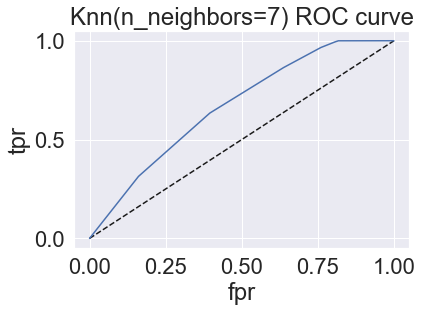

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [40]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6689248390334646

## Hyperparameter tuning:

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors and curve of error rate vs number of neighbours. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation, which we perform on our data set.

In [41]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(features,targets.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
knn_cv.best_score_

0.7717547829664678

In [43]:
knn_cv.best_params_

{'n_neighbors': 49}

Thus a knn classifier with number of neighbors as 49 achieves the best score/accuracy of 0.7718 i.e about 77%

### For k=49:

In [46]:
knn = KNeighborsClassifier(n_neighbors = 49, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
# Evaluation
train_accuracy=knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('KNN Performance on the train set:  Score = %0.4f' % train_accuracy)
print('KNN Performance on the test set:  Score = %0.4f' % test_accuracy)

accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)
knn_cross=accuracies.mean()
print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

y_pred = knn.predict(X_test)

print("Confusion Matrix:")
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

print("Classification report:")
print(classification_report(y_test,y_pred))

print("Area under ROC curve:")
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_score(y_test,y_pred_proba)



KNN Performance on the train set:  Score = 0.8171
KNN Performance on the test set:  Score = 0.8051
KNN Performance on the test set: Cross Validation Score = 0.8152
Confusion Matrix:
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.18      0.31       926
           1       0.80      1.00      0.89      2963

    accuracy                           0.81      3889
   macro avg       0.90      0.59      0.60      3889
weighted avg       0.84      0.81      0.75      3889

Area under ROC curve:


0.6838429908395044